In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from keras import layers
from sklearn.linear_model import LogisticRegression as LogRes
from sklearn.metrics import classification_report as report
from sklearn.metrics import precision_score as precision 
from sklearn.metrics import recall_score as recall
from utils import * 
from models import * 

%matplotlib inline

In [3]:
###Initial Baseline Models 

x_train, y_train = load_data("../data/Simulated_Data_Train.csv")
x_val, y_val = load_data("../data/Simulated_Data_Validation.csv")
x_test, y_test = load_data("../data/Simulated_Data_Test.csv")

lr = log_reg(x_train, y_train) 
nn = feed_forward(x_train, y_train)
nn.train(20)

### Tune Decision Rule for Logistic Regression 
threshold = tune_threshold(y_val, lr.predict(x_val))
print("****** Initial Logitic Regression *********")
print(report(y_test, decide(lr.predict(x_test), threshold)))

print("****** Initial Feed Forward Network *********")
print(report(y_test, nn.predict(x_test)))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
625/625 [==============================] - 0s 713us/step - loss: 6.3763
Epoch 2/20
625/625 [==============================] - 0s 696us/step - loss: 1.6825
Epoch 3/20
625/625 [==============================] - 0s 600us/step - loss: 1.7017
Epoch 4/20
625/625 [==============================] - 0s 603us/step - loss: 1.0467
Epoch 5/20
625/625 [==============================] - 0s 591us/step - loss: 1.0456
Epoch 6/20
625/625 [==============================] - 0s 624us/step - loss: 0.7948
Epoch 7/20
625/625 [

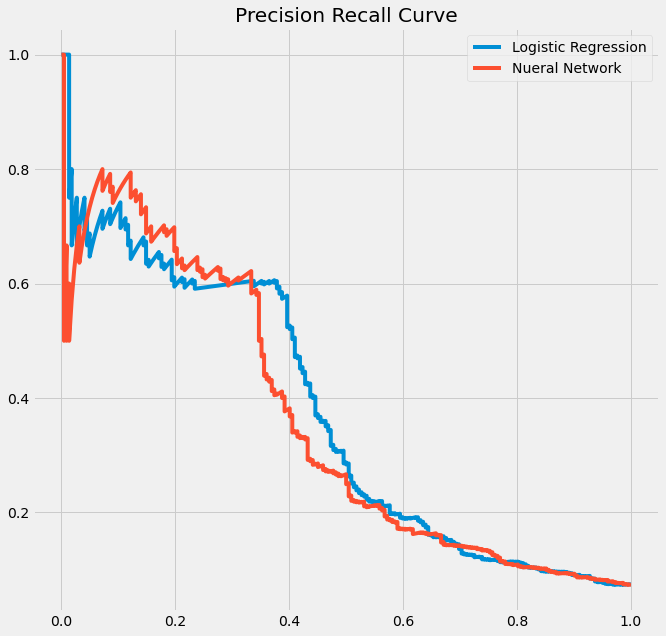

In [4]:
from sklearn.metrics import precision_recall_curve

plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = [10,10]

precision_nn, recall_nn, _ = precision_recall_curve(y_val ,nn.predict_proba(x_val))
precision_lr, recall_lr, _ = precision_recall_curve(y_val ,lr.predict(x_val))

plt.title("Precision Recall Curve")
plt.plot(recall_nn, precision_nn)
plt.plot(recall_lr, precision_lr)

plt.legend(["Logistic Regression", "Nueral Network"])



In [20]:
train_df = load_data("../data/Simulated_Data_Train.csv", as_df = True)
train_df.head()

,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,...,uti_card_50plus_pct,ind_acc_XYZ,rep_income,Default_ind,FL,SC,LA,GA,MS,NC
0,80826.71,15872.99,300.0,114.0,292.0,0.0,0.0,0.0,0.00,3.0,...,0.489594,0.0,69000.000000,0.0,0,0,0,0,0,0
1,96052.60,12178.02,281.0,102.0,232.0,0.0,0.0,0.0,0.00,2.0,...,0.587351,0.0,61000.000000,0.0,1,0,0,0,0,0
2,75212.76,12052.24,261.0,149.0,260.0,0.0,0.0,0.0,0.00,1.0,...,0.413293,0.0,75499.511666,0.0,0,0,0,0,0,0
3,70727.84,8416.80,227.0,93.0,223.0,2.0,1.0,1.0,11013.96,0.0,...,0.466810,0.0,79000.000000,1.0,0,1,0,0,0,0
4,41604.47,10611.97,249.0,136.0,241.0,0.0,0.0,0.0,0.00,0.0,...,0.588442,1.0,75499.511666,0.0,0,0,1,0,0,0
